### Домашнее задание № 1

В папке с домашним заданием находится четыре fasta-файла с протеомами четырех разных организмов. 

1. Прочитайте информацию, содержащуюся в файлах (например, с помощью библиотеки BioPython для Python 3; с помощью библиотеки seqinr для R). 

2. На первом графике постройте 4 ящика с усами для четырех организмов, изображающих одномерные распределения длин белков. Используйте логорифмическую шкалу для большей наглядности. 

3. На втором графике постойте 4 эмпирическую функцию распределения длин белков для четырех организмов. Используйте логарифмическую шкалу для большей наглядности. 

4. Постройте четыре гистограммы длин белков для четырех разных организмов. Длинна осей x и y должны быть одинаковы для всех четырех гистограмм. Ширина столбцов гистограмм и расстояния между ними должно быть одинаково. Подберите оптимальное количество столбцов, чтобы гистограммы были наиболее информативны. Используйте логарифмическую шкалу для большей наглядности. 

5. Пользуясь результатами, которые вы получили, и статьей [Zhang (2000)](https://www.cell.com/trends/genetics/fulltext/S0168-9525(99)01922-8), сделайте предположение, на какие две группы можно разделить представленных организмов. 

Для выполнения домашнего задания может быть использован любой язык программирования или программа для работы с электронными таблицами. Главное условие - я без особых проблем получить результаты у себя на компьютере во время проверки. Мне было бы максимально удобно проверять задание либо в Python, либо в R, в Jupyter Notebook.

### Задание № 1

In [ ]:
library(seqinr) # a library to read fasta files

In [334]:
options(warn=-1) # ask r not to return warnings

In [335]:
# get fasta files' names in the working directory
fastas = list.files()[sapply(list.files(), function(x) strsplit(x, "\\.")[[1]][2] == "fasta")]

# define list to store protein length
protein_length = list()

# get vectors of protein lengths for each fasta file and store them the the list
for (fasta in fastas){
    protein_length[[strsplit(fasta, "\\.")[[1]][1]]]=as.integer(lapply(read.fasta(fasta), length))
}

### Задание № 2

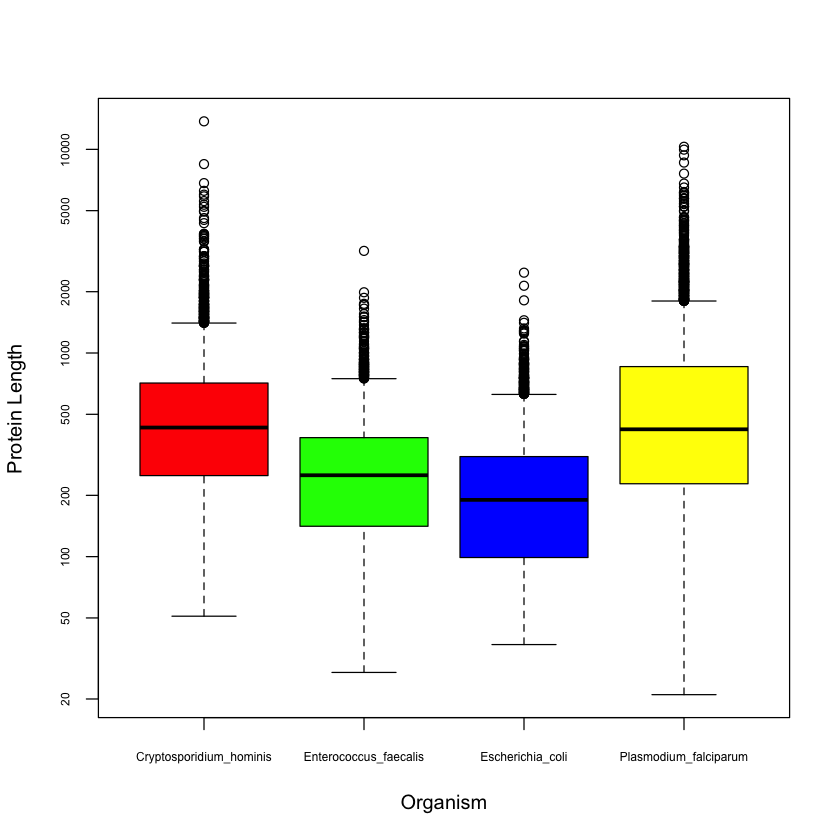

In [336]:
# define colours
cols = c("red", "green", "blue", "yellow")

# plot boxplots
par(cex.axis=0.6) 
boxplot(protein_length, 
        log="y", 
        xlab="Organism",
        ylab="Protein Length",
        col = cols
       )

### Задание № 3

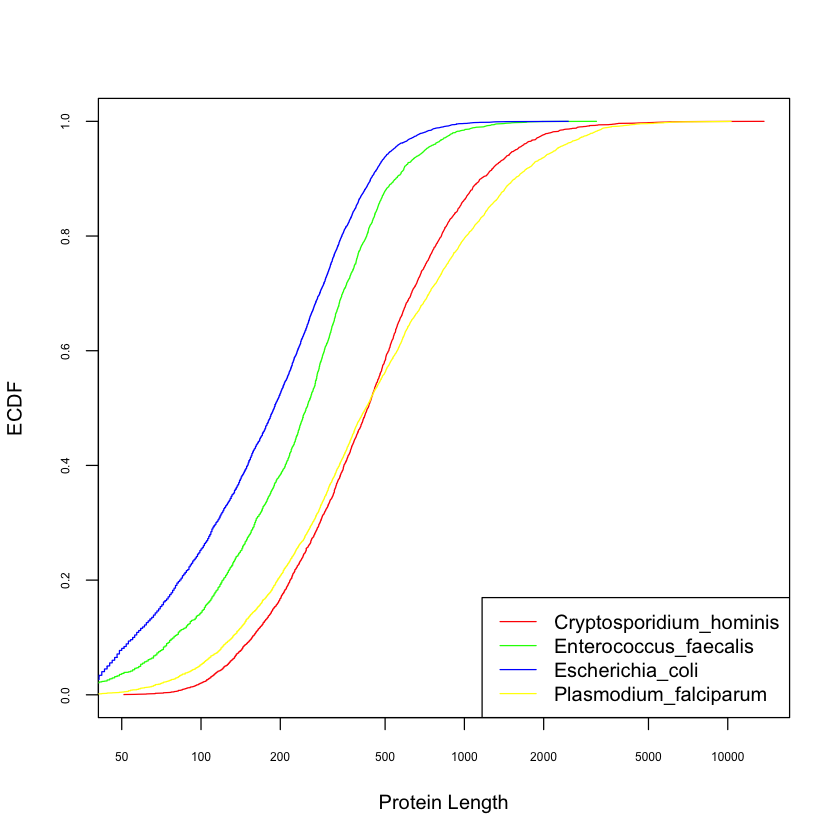

In [337]:
# plot empirical comulative distribution function

# plot ecdf for the first organism
par(cex.axis=0.6) 
plot(sort(protein_length$Cryptosporidium_hominis), 
     (1:length(protein_length$Cryptosporidium_hominis))/length(protein_length$Cryptosporidium_hominis),
    type="l",
    log="x", 
    col=cols[1], 
    xlab="Protein Length",
    ylab="ECDF")

# add 3 other organisms to the first plot
for (i in 2:4){
    lines(sort(protein_length[[i]]), (1:length(protein_length[[i]]))/length(protein_length[[i]]), col=cols[i])
}

# add legend
legend("bottomright", legend=names(protein_length),
       col=cols, lwd=1, cex=1)

### Задание № 4

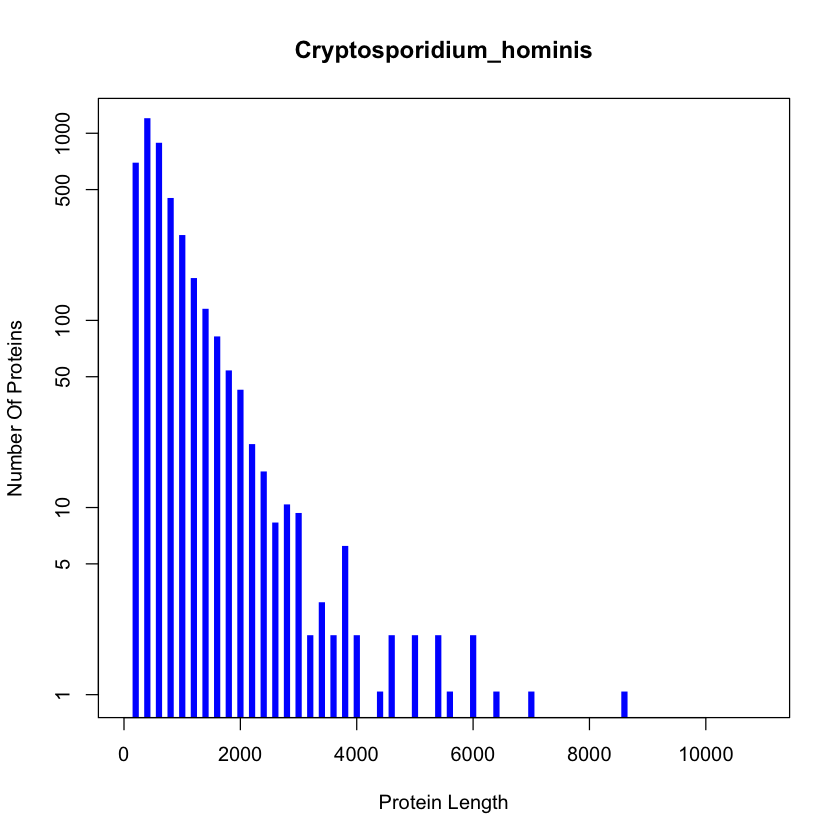

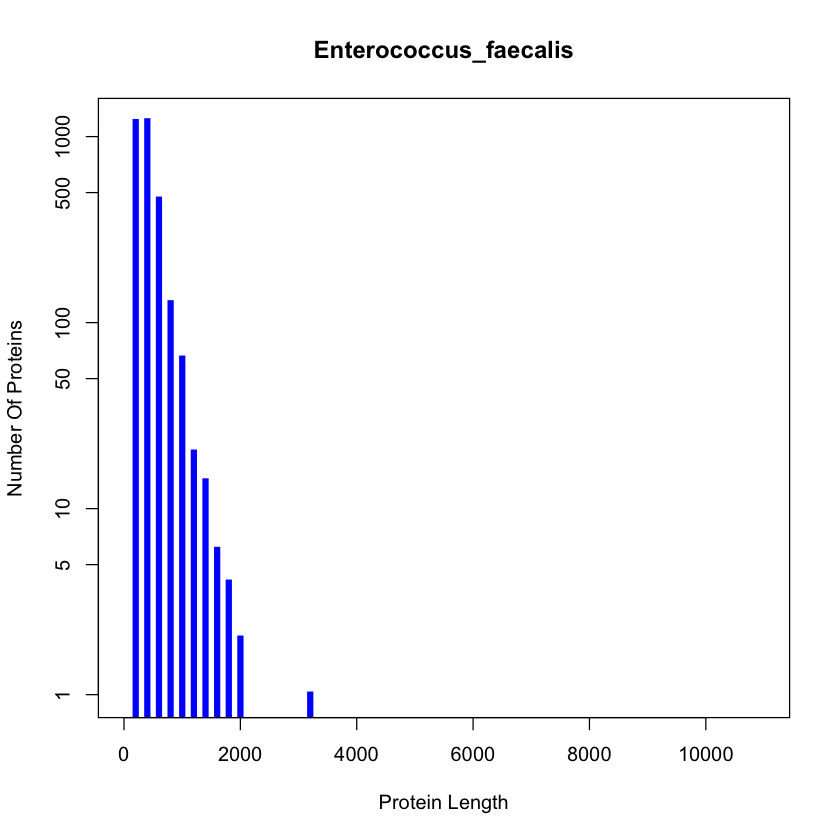

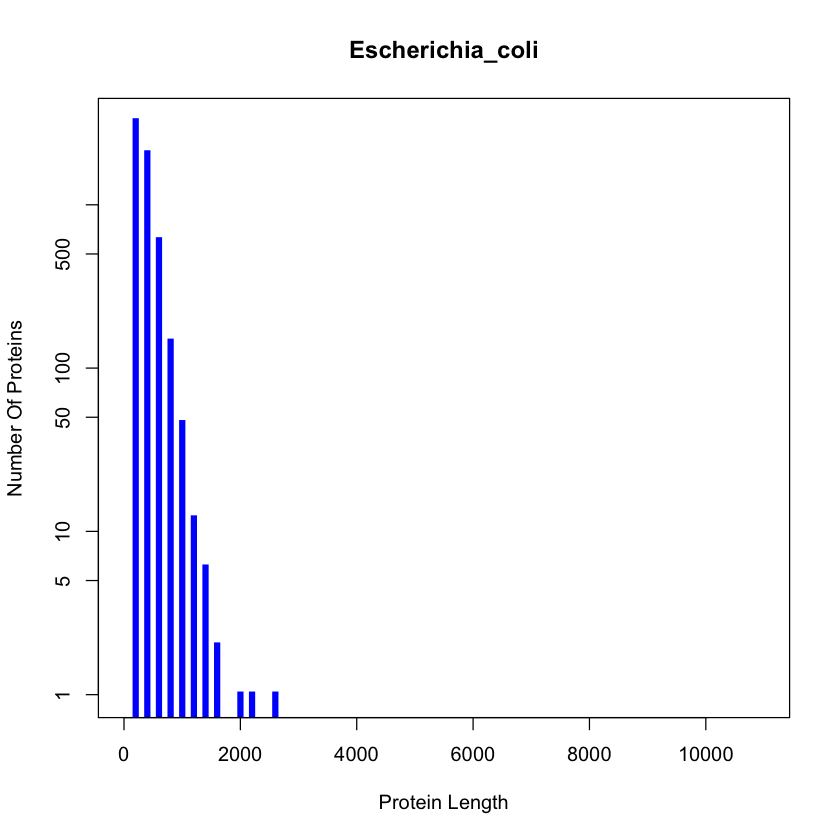

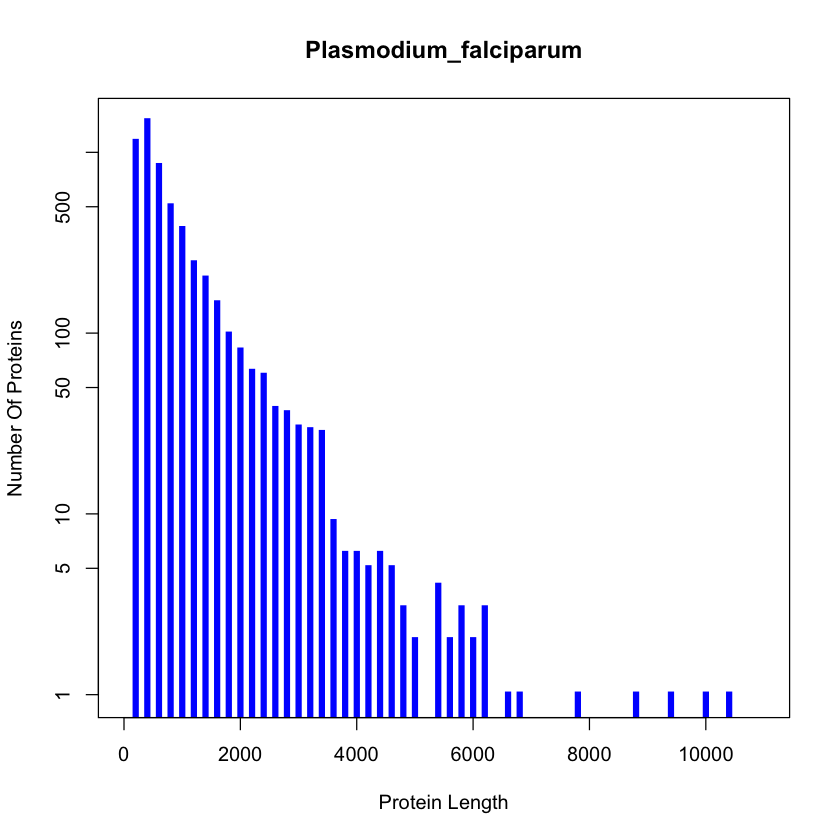

In [362]:
# plot histogram for each organism

for (i in 1:4){
    mydata_hist <- hist(protein_length[[i]], plot=FALSE, breaks = seq(1, 14000, 200))
    plot(mydata_hist$breaks[-1], 
         mydata_hist$counts, 
         log = "y", 
         type = "h",  
         lwd=5, 
         lend=2, 
         col="blue", 
         borders="red",
         xlim=c(0, 11000),
         main=names(protein_length)[i],
         xlab="Protein Length",
         ylab="Number Of Proteins")
}

### Задание № 5

В средние и медианы длин белков у эукариот больше, чем у прокариот. Enterococcus faecalis и Escherichia coli 
относятся к прокариотам, Cryptosporidium hominis и Plasmodium falciparum относятся к эукариотам.